In [204]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

In [205]:
data = []
#Each line in the json is an evolutionary run
with open('novelty_level_corpus.json', 'r') as fp:
    for levels_json in fp:
        if levels_json != "\n":
            di = json.loads(levels_json)
            data.append(di)

In [206]:
avg_fitness = [np.average(f) for f in data[-1]['fitness']]
last_generation_latent = data[-1]['latent_vectors'][-1]
last_generation_fitness = data[-1]['fitness'][-1]
last_generation_level = data[-1]['level_representations'][-1]

first_generation_latent = data[-1]['latent_vectors'][0]
first_generation_fitness = data[-1]['fitness'][0]
first_generation_level = data[-1]['level_representations'][0]

In [207]:
flattened_points_last = np.zeros(shape = (len(last_generation_latent)*5, 3))
flattened_points_first = np.zeros(shape = (len(last_generation_latent)*5, 3))
t = 0
for i, lvl in enumerate(last_generation_latent):
    for latent_vector in lvl:
        li = latent_vector + [last_generation_fitness[i]]
        flattened_points_last[t,:] = np.array(li)
        t+=1
        
t = 0
for i, lvl in enumerate(first_generation_latent):
    for latent_vector in lvl:
        li = latent_vector + [first_generation_fitness[i]]
        flattened_points_first[t,:] = np.array(li)
        t+=1
        
        

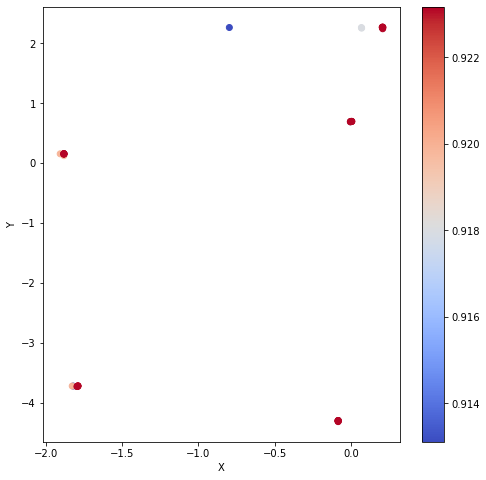

In [208]:

x = flattened_points_last[:, 0]
y = flattened_points_last[:, 1]
z = flattened_points_last[:, 2]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
cm = plt.cm.get_cmap('coolwarm')

fig = plt.figure(figsize=(8, 8))


ax = fig.add_subplot()
img = ax.scatter(x, y, c = z, cmap=cm)
fig.colorbar(img)

ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.savefig("last_gen.png")

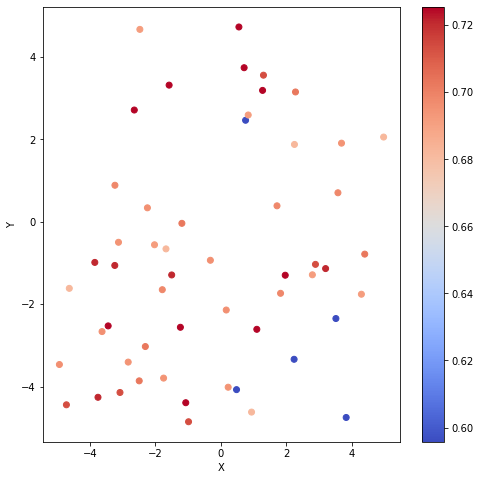

In [209]:
x = flattened_points_first[:, 0]
y = flattened_points_first[:, 1]
z = flattened_points_first[:, 2]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
cm = plt.cm.get_cmap('coolwarm')

fig = plt.figure(figsize=(8, 8))


ax = fig.add_subplot()
img = ax.scatter(x, y, c = z, cmap=cm)
fig.colorbar(img)

ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.savefig("first_gen.png")

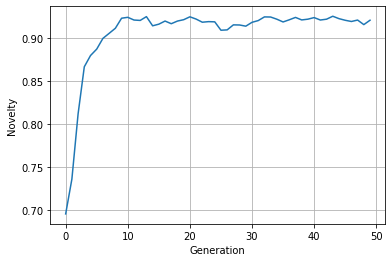

In [210]:
# Data for plotting
t = np.arange(len(avg_fitness))

fig, ax = plt.subplots()
ax.plot(t, avg_fitness)

ax.set(xlabel='Generation', ylabel='Novelty')
ax.grid()

fig.savefig("test.png")
plt.show()